1 ask your self => are X y numeric => scatter graph
2 is column a category => bar or count graph
3 want to see distribution => histogram, KDE, box graph


## PROBLEM STATEMENT
 can we chk the hour study make impact on marks

## SOLUTION STATEMENT
linearregression to learn study hour and predict final score

### a web app to predict marks


In [ ]:
from google.colab import files
files.upload()

Saving student_dataset_pakistan_updated.csv to student_dataset_pakistan_updated.csv


{'student_dataset_pakistan_updated.csv': b'Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,study_hour_per_week,family_income,internet_access,parent_education,stress_level\nS1000,Hina,Qureshi,student0@univ.pk,Female,25,Engineering,96.65,53.96,91.04,36.71,99.87,83.66,33.25,66.415,C,40,low,yes,bachelor,6\nS1001,Omar,Shah,student1@univ.pk,Male,19,Mathematics,73.98,71.41,94.0,92.57,64.65,59.73,87.47,78.305,B,7,high,yes,master,7\nS1002,Zubair,Chaudhry,student2@univ.pk,Male,20,Engineering,85.91,47.25,71.32,82.7,41.35,49.55,62.81,59.1633,C,1,low,yes,phd,5\nS1003,Maria,Hussain,student3@univ.pk,Female,18,Mathematics,74.03,45.19,47.63,68.11,49.46,69.09,99.75,63.205,C,17,moderate,no,bachelor,7\nS1004,Zubair,Rana,student4@univ.pk,Male,21,CS,86.9,96.11,32.32,44.66,70.95,35.61,75.51,59.1933,C,15,high,yes,master,8\nS1005,Zubair,Sheikh,student5@univ.pk,Male,19,Business,6

In [ ]:
# filename = 'student_dataset_pakistan.csv'
# filename

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('student_dataset_pakistan_updated.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,study_hour_per_week,family_income,internet_access,parent_education,stress_level
0,S1000,Hina,Qureshi,student0@univ.pk,Female,25,Engineering,96.65,53.96,91.04,...,99.87,83.66,33.25,66.4150,C,40,low,yes,bachelor,6
1,S1001,Omar,Shah,student1@univ.pk,Male,19,Mathematics,73.98,71.41,94.00,...,64.65,59.73,87.47,78.3050,B,7,high,yes,master,7
2,S1002,Zubair,Chaudhry,student2@univ.pk,Male,20,Engineering,85.91,47.25,71.32,...,41.35,49.55,62.81,59.1633,C,1,low,yes,phd,5
3,S1003,Maria,Hussain,student3@univ.pk,Female,18,Mathematics,74.03,45.19,47.63,...,49.46,69.09,99.75,63.2050,C,17,moderate,no,bachelor,7
4,S1004,Zubair,Rana,student4@univ.pk,Male,21,CS,86.90,96.11,32.32,...,70.95,35.61,75.51,59.1933,C,15,high,yes,master,8


step 1

In [ ]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [ ]:
df.columns = df.columns.str.lower()
df.columns
df[['midterm_score']]


,midterm_score
0,53.96
1,71.41
2,47.25
3,45.19
4,96.11
...,...
995,33.49
996,43.95
997,90.78
998,37.02


Intercept: 63.13634464395261
Coefficients: [0.06374896]
mae 17.46
mse 400.3
rmse 20.01
r^2 score 0.0


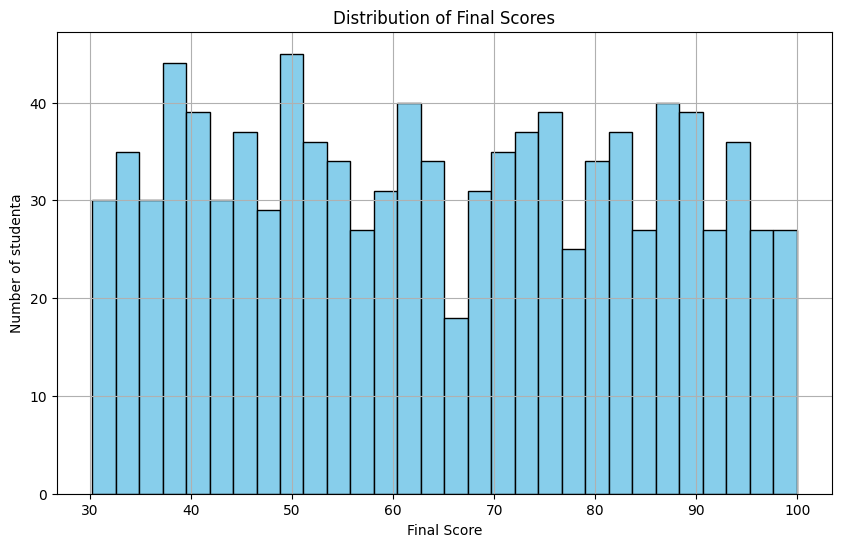

In [ ]:
X = df[['study_hour_per_week']]
y = df['final_score']

model = LinearRegression()
model.fit(X,y)

pred_score = model.predict(X)

# Model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# show results
mae= mean_absolute_error(y,pred_score)
mse= mean_squared_error(y,pred_score)
rmse = np.sqrt(mse)
r2 = r2_score(y,pred_score)

print('mae', round(mae, 2))
print('mse', round(mse, 2))
print('rmse', round(rmse, 2))
print('r^2 score', round(r2 , 2))

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['final_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Final Score')
plt.ylabel('Number of studenta')
plt.title('Distribution of Final Scores')
plt.grid(True)
plt.show()


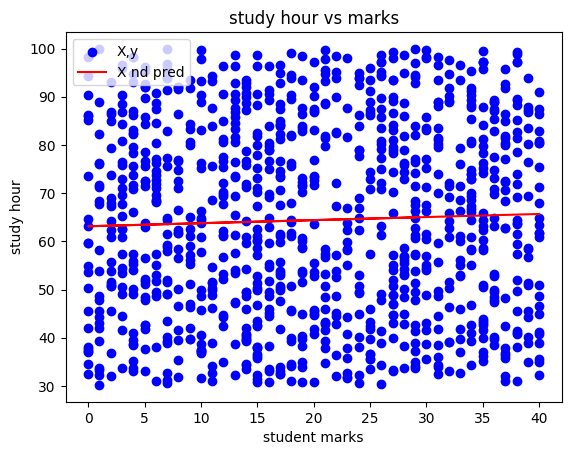

In [ ]:
plt.scatter(X,y, color='blue', label='X,y')
plt.plot(X,pred_score, color = 'red', label='X nd pred')
plt.legend()
plt.xlabel('student marks')
plt.ylabel('study hour')
plt.title('study hour vs marks')
plt.show()



Intercept: 63.550711751683295
Coefficients: [ 0.06318165 -0.00624143]
mae 17.46
mse 400.29
rmse 20.01
r^2 score 0.0


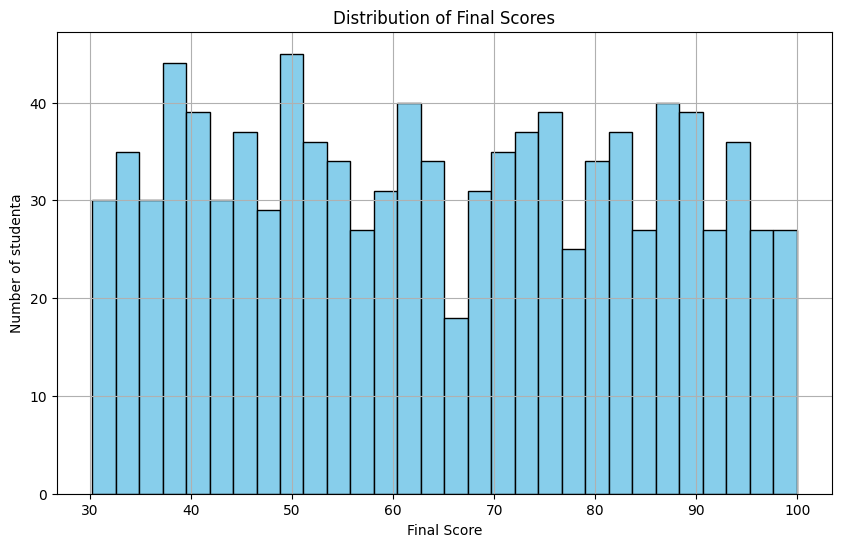

In [ ]:
X = df[['study_hour_per_week', 'midterm_score', ]]
y = df['final_score']

model = LinearRegression()
model.fit(X,y)

pred_score = model.predict(X)

# Model parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# show results
mae= mean_absolute_error(y,pred_score)
mse= mean_squared_error(y,pred_score)
rmse = np.sqrt(mse)
r2 = r2_score(y,pred_score)

print('mae', round(mae, 2))
print('mse', round(mse, 2))
print('rmse', round(rmse, 2))
print('r^2 score', round(r2 , 2))

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['final_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Final Score')
plt.ylabel('Number of studenta')
plt.title('Distribution of Final Scores')
plt.grid(True)
plt.show()


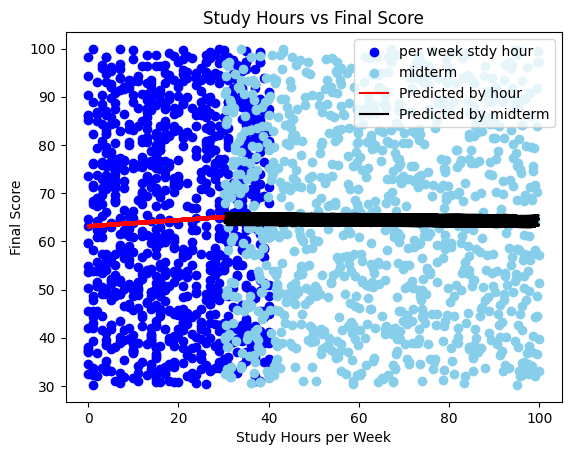

In [ ]:

# Predict scores
pred_score = model.predict(X)

# Scatter plot (study hours vs actual final score)
plt.scatter(df['study_hour_per_week'], y, color='blue', label='per week stdy hour')
plt.scatter(df['midterm_score'], y, color='skyblue', label='midterm')

# Line plot (study hours vs predicted final score)
plt.plot(df['study_hour_per_week'], pred_score, color='red', label='Predicted by hour')
plt.plot(df['midterm_score'], pred_score, color='black', label='Predicted by midterm')

plt.legend()
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Score')
plt.title('Study Hours vs Final Score')
plt.show()

In [ ]:
pred_in = float(input("enter hour to guess marks"))
pred = model.predict([[pred_in]])
print(pred)

In [ ]:
df.columns = df.columns.str.capitalize()
df.columns


In [ ]:
df.columns